# Problem Statement

The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.

The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in R and achieve the following goals: 

Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized.<br/>
Present the financial benefit of this project to the marketing team.

# Data

Abstact: The data is related with the direct-marketing campaigns(phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term of deposit(variable y). 

In [2]:
import  pandas  as  pd                 # For data manipulation and analysis
import  numpy as  np                   # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs

In [4]:
data = pd.read_csv(r'C:\Users\Amit Tiwari\Downloads\bank\bank-full.csv',sep=';')

In [5]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
from sklearn.feature_extraction import DictVectorizer

In [10]:
num_variables = ["age","duration","campaign","pdays","previous"]
cat_variables = [i for i in data.columns if i not in num_variables]
cat_variables.remove("y")
Label = "y"

<b>Plotting box plot to anlayse the distribution of different numerical attributes</b>

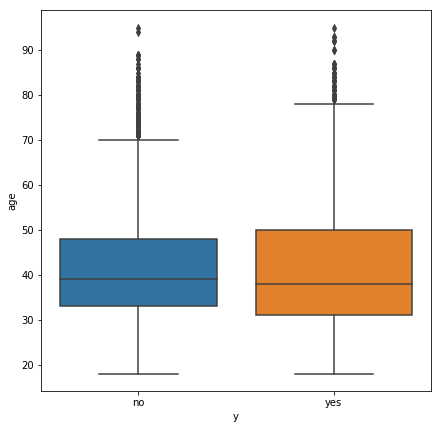

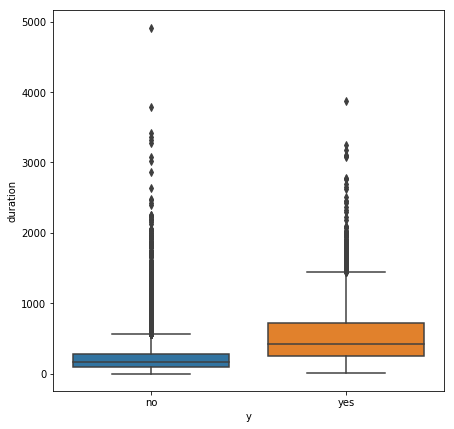

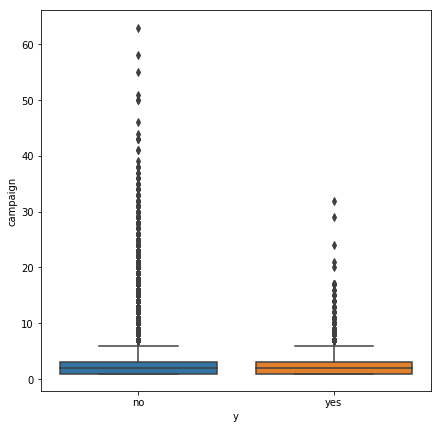

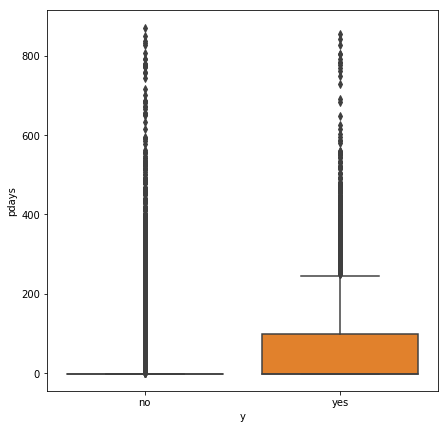

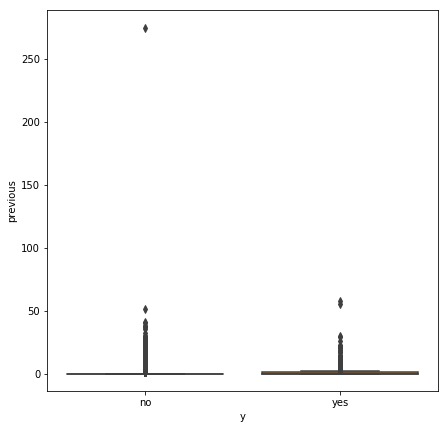

In [11]:
for i in num_variables:
    plt.figure(figsize=(7,7))
    sns.boxplot(x=Label,y=i,data=data)
    plt.show()

<b>Plotting bar plot to analyse the distribution of categorical attributes</b>

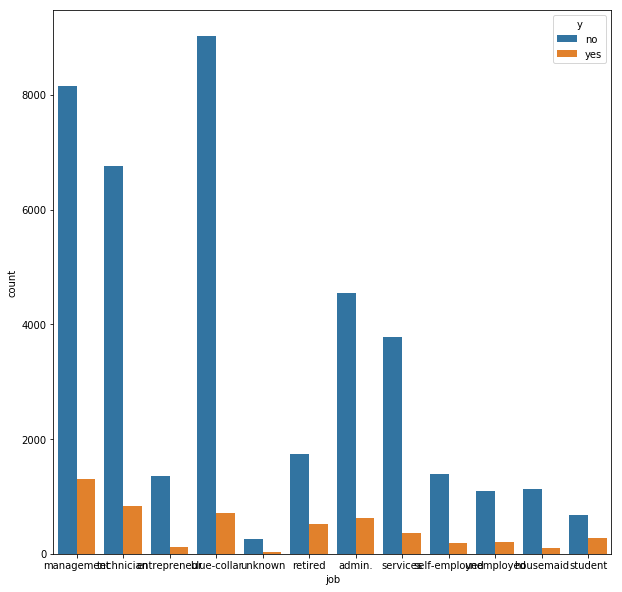

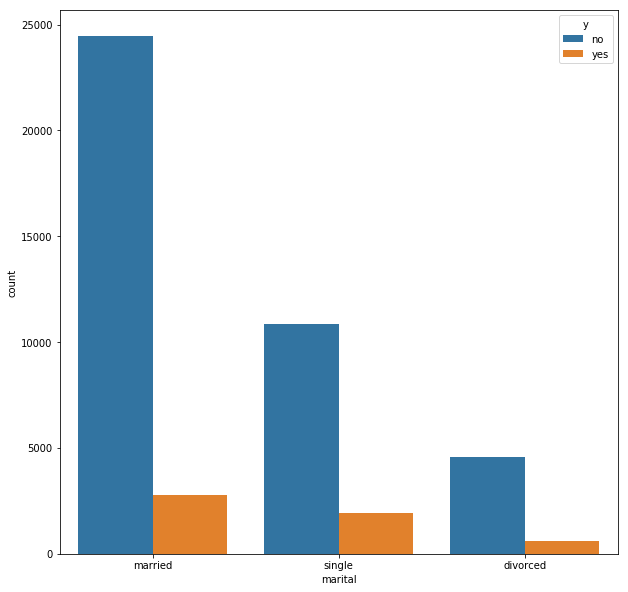

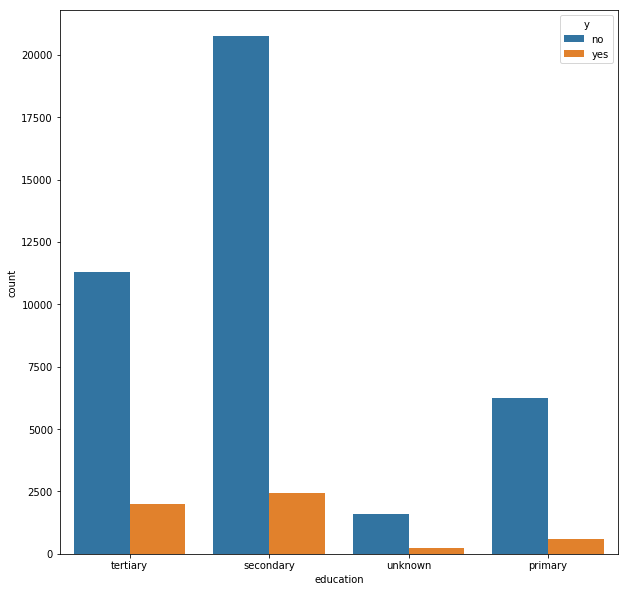

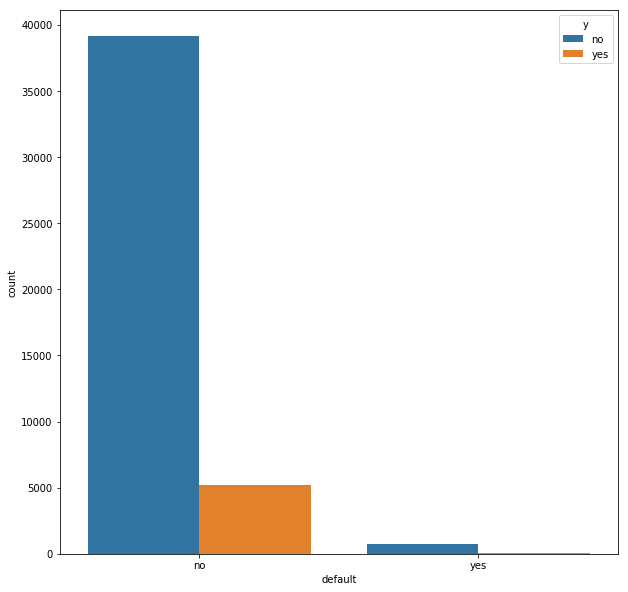

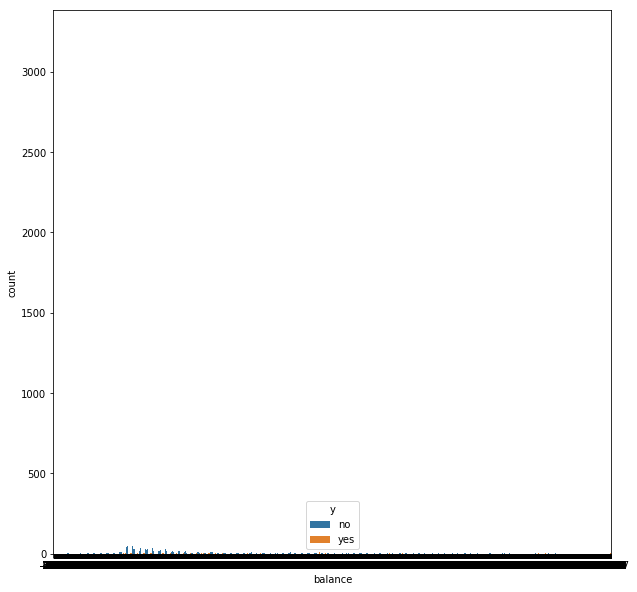

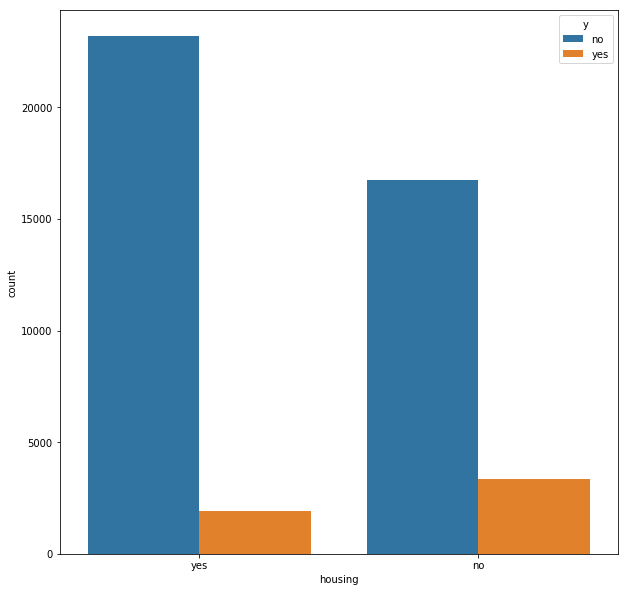

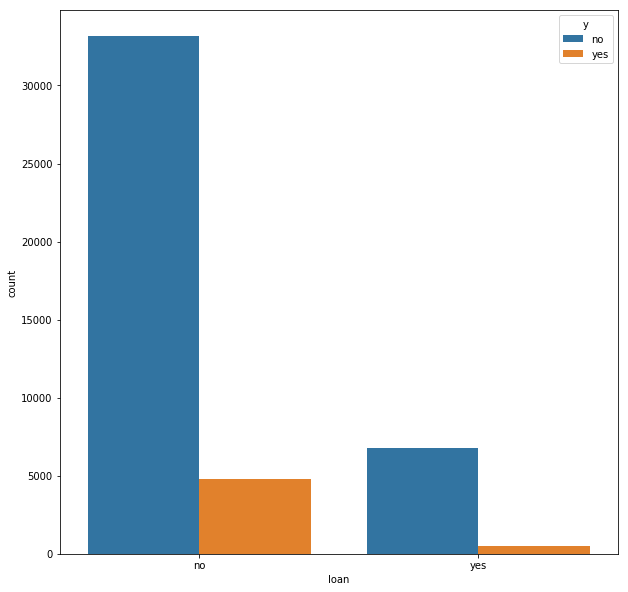

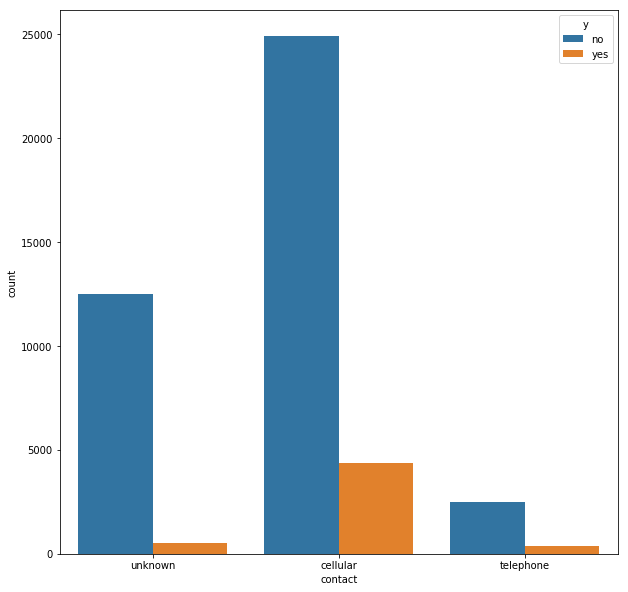

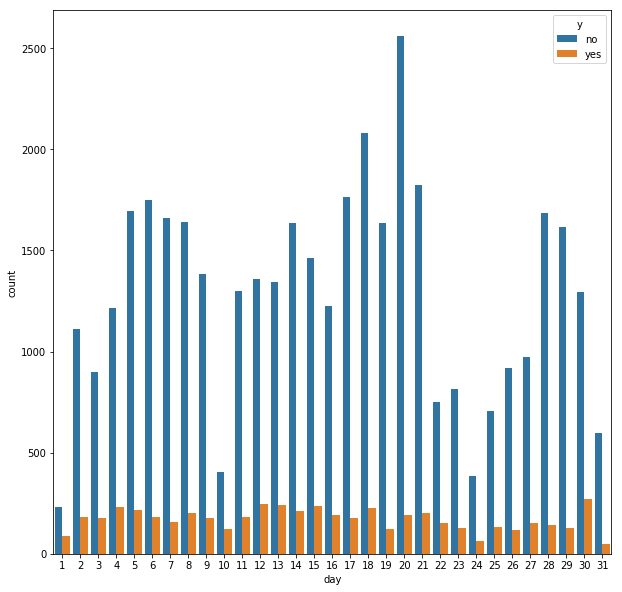

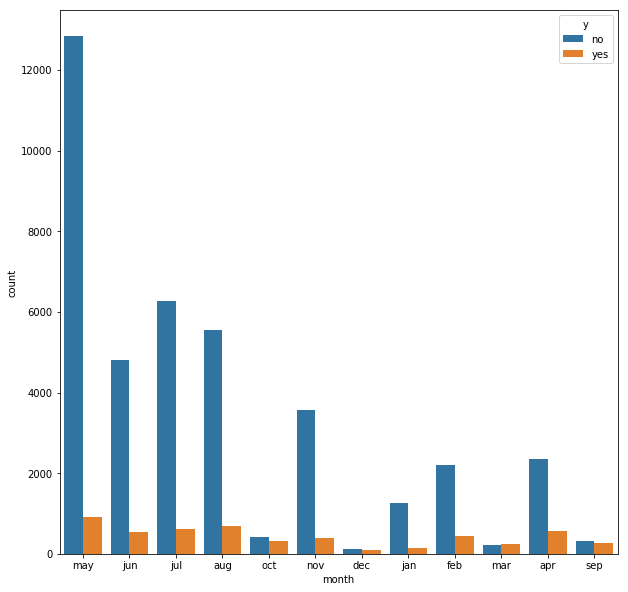

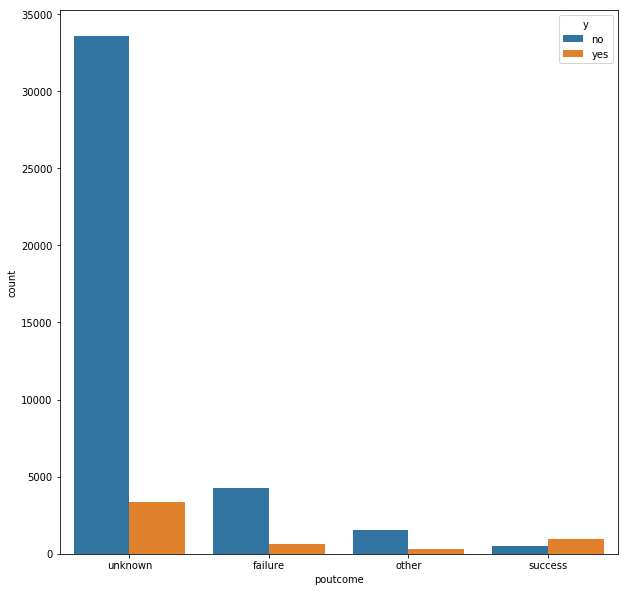

In [12]:
for i in cat_variables:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i, hue=Label, data=data)
    plt.show()

# Binary Classification:

Binary or binomial classification is the task of classifying the elements of a given set into two groups (predicting which group each one belongs to) on the basis of a classification rule. Contexts requiring a decision as to whether or not an item has some qualitative property, some specified characteristic, or some typical binary classification include:<br>
Medical testing to determine if a patient has certain disease or not – the classification property is the presence of the disease. <br> A "pass or fail" test method or quality control in factories.

In [13]:
y = data['y']

In [14]:
y = y.replace(['yes','no'],(1,0))

In [15]:
from sklearn import preprocessing
def encode_features(df_train):
    features = ['job','marital','default','education','housing','loan','contact','month','poutcome']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train

In [16]:
data = encode_features(data)

In [17]:
X = data.drop(['y'], axis = 1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)

# Logistic Regression

In [25]:
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression

In [28]:
logreg = linear_model.LogisticRegression(penalty = 'l1' ,C=0.5,solver='warn')

In [29]:
logreg.fit(X_train,y_train)

C:\Users\Amit Tiwari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_pred = logreg.predict(X_test)

In [32]:
from  sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
cnf = confusion_matrix(y_pred,y_test)

In [34]:
cnf

array([[11734,  1231],
       [  271,   328]], dtype=int64)

In [35]:
accuracy_score(y_pred,y_test)

0.8892657033323503

# RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
from sklearn.datasets import make_classification
import numpy as np

In [40]:
randomforest = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=13,criterion='gini')

In [41]:
randomforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [43]:
y_pred = randomforest.predict(X_test)

In [44]:
accuracy_score(y_pred,y_test)

0.9042317900324388

<b>Random Forest by dropping categorical variable as they don't gives significant information about the prospect decsion. So we can remove them from our data and Numerical variable pdays could also be removed as it has all the values similar.</b>

In [45]:
Data=data

In [46]:
Data=Data.drop(cat_variables,axis=1)

In [47]:
num_variables.remove("pdays")

In [48]:
data_dict = Data.T.to_dict().values()

In [49]:
vec = DictVectorizer()
conv_to_array = vec.fit_transform(data_dict).toarray()
feature_names = vec.get_feature_names()

In [50]:
Data = pd.DataFrame(conv_to_array,columns=feature_names)
Data.head()

,age,campaign,duration,pdays,previous,y=no,y=yes
0,58.0,1.0,261.0,-1.0,0.0,1.0,0.0
1,44.0,1.0,151.0,-1.0,0.0,1.0,0.0
2,33.0,1.0,76.0,-1.0,0.0,1.0,0.0
3,47.0,1.0,92.0,-1.0,0.0,1.0,0.0
4,33.0,1.0,198.0,-1.0,0.0,1.0,0.0


In [51]:
X = conv_to_array[:,:-2]
X = np.hstack((X[:,:7],X[:,8:]))
y = conv_to_array[:,-1]
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking 
print("Feature ranking:")

for i in range(X.shape[1]):
    print("%d. feature :%s (%f)" % (i + 1, feature_names[indices[i]], importances[indices[i]]))

Feature ranking:
1. feature :duration (0.565911)
2. feature :age (0.218936)
3. feature :pdays (0.122462)
4. feature :campaign (0.051770)
5. feature :previous (0.040920)


<i><b>Plotting regression plots for different attributes</b></i>

C:\Users\Amit Tiwari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


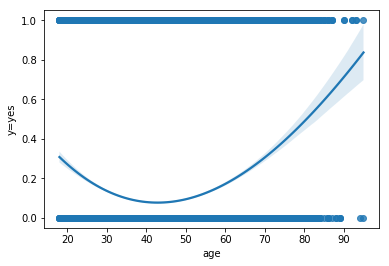

In [52]:
ax = sns.regplot(x="age", y="y=yes", order=3, data=Data, truncate=True)

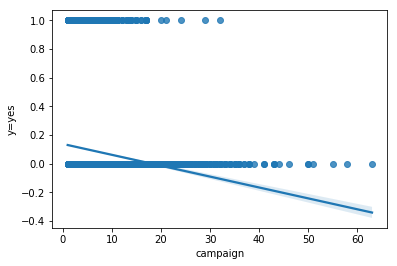

In [53]:
ax = sns.regplot(x="campaign", y="y=yes", order=1, data=Data, truncate=True)

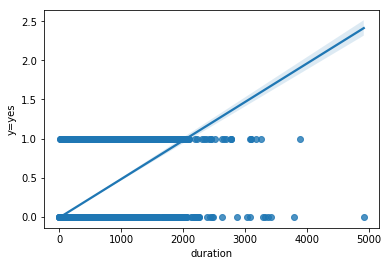

In [54]:
ax = sns.regplot(x="duration", y="y=yes", order=1, data=Data, truncate=True)

In [55]:
sum(Data['y=yes'])/sum(Data['campaign'])

0.042326899068472104

<b>Optimization using compaign</b>

In [56]:
# Total Conversion ratio
sum(Data['y=yes'])/sum(Data['campaign'])

0.042326899068472104

<i><b>Efficiency on each additional call</b></i>

In [58]:
print("Nth Call \t Conversion ratio")
for i in range(1,30):
    eff = sum(Data.loc[Data['campaign']==i]['y=yes']) / float(Data.loc[Data['campaign'] >= i].shape[0])
    print (str((i))+" \t\t "+str(eff))

Nth Call 	 Conversion ratio
1 		 0.05664550662449404
2 		 0.050637944121155166
3 		 0.0407597942223981
4 		 0.032880406596826055
5 		 0.02271613008661546
6 		 0.021125143513203215
7 		 0.015339425587467363
8 		 0.013739802490339202
9 		 0.011738401341531582
10 		 0.009575923392612859
11 		 0.013377926421404682
12 		 0.004020100502512563
13 		 0.007142857142857143
14 		 0.005657708628005658
15 		 0.006514657980456026
16 		 0.0037735849056603774
17 		 0.013303769401330377
18 		 0.0
19 		 0.0
20 		 0.003484320557491289
21 		 0.004098360655737705
22 		 0.0
23 		 0.0
24 		 0.006097560975609756
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.012048192771084338


<b>The market acceptable conversion ratio ranges from 2-10% and from above we can see that after 10th call the ratio is around 1.5%. So the calls after 6th call are not acceptable</b>

In [59]:
print("For age upto 30")
print ("Nth Call \t Conversion ratio")
for i in range(1,30):
    num = float(Data[(Data['age'] <= 30) & (Data['campaign']==i) & (Data['y=yes']==1)].shape[0])
    den = 1+float(Data[(Data['age'] <= 30) & (Data['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age upto 30
Nth Call 	 Conversion ratio
1 		 0.08277627648983076
2 		 0.07807731434384538
3 		 0.0585956416464891
4 		 0.046191247974068074
5 		 0.040103492884864166
6 		 0.02529182879377432
7 		 0.02981029810298103
8 		 0.02456140350877193
9 		 0.00847457627118644
10 		 0.005319148936170213
11 		 0.012738853503184714
12 		 0.014598540145985401
13 		 0.016129032258064516
14 		 0.009523809523809525
15 		 0.021052631578947368
16 		 0.0
17 		 0.025
18 		 0.0
19 		 0.0
20 		 0.018867924528301886
21 		 0.020833333333333332
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [60]:
print("For age between 30-40")
print ("Nth Call \t Conversion ratio")
for i in range(1,30):
    num = float(Data[(Data['age'] <= 40) & (Data['age'] > 30) & (Data['campaign']==i) & (Data['y=yes']==1)].shape[0])
    den = 1+float(Data[(Data['age'] <= 40) & (Data['age'] > 30) & (Data['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age between 30-40
Nth Call 	 Conversion ratio
1 		 0.04675486205336952
2 		 0.045751033532384015
3 		 0.03657084538186767
4 		 0.032620320855614976
5 		 0.017871986699916874
6 		 0.022675736961451247
7 		 0.015187849720223821
8 		 0.014477766287487074
9 		 0.016304347826086956
10 		 0.008291873963515755
11 		 0.013972055888223553
12 		 0.002364066193853428
13 		 0.005681818181818182
14 		 0.006779661016949152
15 		 0.00398406374501992
16 		 0.009345794392523364
17 		 0.005714285714285714
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.013157894736842105
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [61]:
print("For age between 40-50")
print ("Nth Call \t Conversion ratio")
for i in range(1,30):
    num = float(Data[(Data['age'] <= 50) & (Data['age'] > 40) & (Data['campaign']==i) & (Data['y=yes']==1)].shape[0])
    den = 1+float(Data[(Data['age'] <= 50) & (Data['age'] > 40) & (Data['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age between 40-50
Nth Call 	 Conversion ratio
1 		 0.042170818505338076
2 		 0.036985539488320354
3 		 0.03135717785399314
4 		 0.025806451612903226
5 		 0.01772002362669817
6 		 0.015833333333333335
7 		 0.011695906432748537
8 		 0.00927357032457496
9 		 0.01
10 		 0.007317073170731708
11 		 0.011976047904191617
12 		 0.0
13 		 0.004329004329004329
14 		 0.005235602094240838
15 		 0.006060606060606061
16 		 0.0
17 		 0.008403361344537815
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.047619047619047616


In [62]:
print("For age between 50-60")
print ("Nth Call \t Conversion ratio")
for i in range(1,30):
    num = float(Data[(Data['age'] <= 60) & (Data['age'] > 50) & (Data['campaign']==i) & (Data['y=yes']==1)].shape[0])
    den = 1+float(Data[(Data['age'] <= 60) & (Data['age'] > 50) & (Data['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age between 50-60
Nth Call 	 Conversion ratio
1 		 0.050322260783341594
2 		 0.03881008668242711
3 		 0.03519163763066202
4 		 0.02694136291600634
5 		 0.017994858611825194
6 		 0.02028639618138425
7 		 0.00530035335689046
8 		 0.011933174224343675
9 		 0.003257328990228013
10 		 0.015748031496062992
11 		 0.010050251256281407
12 		 0.006211180124223602
13 		 0.007518796992481203
14 		 0.0
15 		 0.0
16 		 0.0
17 		 0.012658227848101266
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [63]:
print("For age above 60")
print ("Nth Call \t Conversion ratio")
for i in range(1,30):
    num = float(Data[(Data['age'] > 60) & (Data['campaign']==i) & (Data['y=yes']==1)].shape[0])
    den = float(Data[(Data['age'] > 60) & (Data['campaign'] >= i)].shape[0])+1
    print (str((i))+" \t\t "+str(num/den))

For age above 60
Nth Call 	 Conversion ratio
1 		 0.2287636669470143
2 		 0.22657580919931858
3 		 0.19557195571955718
4 		 0.13194444444444445
5 		 0.16470588235294117
6 		 0.06818181818181818
7 		 0.14285714285714285
8 		 0.0
9 		 0.06666666666666667
10 		 0.08333333333333333
11 		 0.1
12 		 0.0
13 		 0.0
14 		 0.0
15 		 0.0
16 		 0.0
17 		 0.3333333333333333
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


<b>Age groups do not show any remarkable patterns compared to the numbers over all ages<b>

In [65]:
# total calls made
total_calls = sum(Data['campaign'])
print(total_calls)

124956.0


In [66]:
# total calls made after 6th call
extra_calls = sum(Data[Data['campaign']>6]['campaign']) - 6*Data[Data['campaign']>6].shape[0]
print(extra_calls)

16801.0


In [67]:
#market cost reduction
reduction=100*extra_calls/total_calls
print(reduction)

13.445532827555299


In [68]:
total_sales=float(Data[Data['y=yes']==1].shape[0])
print(total_sales)

5289.0


In [69]:
less_costly_sales=float(Data[(Data['campaign'] <= 6) & (Data['y=yes']==1)].shape[0])
print(less_costly_sales)

5128.0


In [70]:
#Prospects acquired
sales_percent=100*less_costly_sales/total_sales
print(sales_percent)

96.95594630364909


# MLPClassifier

In [71]:
from sklearn.neural_network import MLPClassifier

In [72]:
classi = MLPClassifier(alpha=1, hidden_layer_sizes=15)

In [73]:
classi.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=15, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [76]:
y_pred = classi.predict(X_test)

In [77]:
accuracy_score(y_pred,y_test)

0.8927307578885284

# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
model = KNeighborsClassifier(6)

In [80]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [81]:
y_pred = model.predict(X_test)

In [82]:
accuracy_score(y_pred,y_test)

0.8846210557357712

# Data Prediction for all the Classifiers

In [83]:
r_random = pd.read_csv(r'C:\Users\Amit Tiwari\Downloads\bank\bank-full.csv',sep=';')

In [84]:
y_random = r_random['y']

In [85]:
y_random = y_random.replace(['yes','no'],(1,0))

In [86]:
X_random = r_random.drop(['y'], axis = 1)

In [87]:
X_random = encode_features(X_random)

In [88]:
y_pred_knn = model.predict(X_random)

<b>Accuracy score by KNN</b>

In [89]:
accuracy_score(y_pred_knn,y_random)

0.8986529826812059

<b>Accuracy score by MLP Classifier</b>

In [91]:
y_pred_classi = classi.predict(X_random)

In [92]:
accuracy_score(y_pred_classi,y_random)

0.8907566742606887

<b>Accuracy score by Logistic Regression</b>

In [93]:
y_pred_logreg = logreg.predict(X_random)

In [94]:
accuracy_score(y_pred_logreg,y_random)

0.8908009112826525

<b>Accuracy score by Random Forest</b>

In [96]:
y_pred_ranfor = randomforest.predict(X_random)

In [98]:
accuracy_score(y_pred_ranfor,y_random)

0.9247749441507598

<b>Best Accuracy is obtained by Random Forest</b>

# Result

<b>With the 13.44% reduction in market 96.6% sales can be maintained if any person is called maximum of 10 times</b>